# A2-Q3: Parametric Spline

In [2]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

## (a) Write your nickname and display it

In [12]:
# [1] Display nickname image

f = plt.imread('luy.jpeg')
plt.figure(figsize=(9,5)); 
plt.imshow(f);
x = plt.ginput(8);
print(x);

[(702.5458781362006, 188.83118279569885), (703.4892473118279, 243.54659498207877), (711.0362007168458, 297.31863799283144), (761.0347670250895, 277.5078853046594), (792.1659498207885, 219.96236559139777), (811.0333333333332, 159.58673835125438), (811.0333333333332, 243.54659498207877), (836.5043010752687, 302.03548387096765)]


## (b) Hardcode interpolation points

In [17]:
# === YOUR CODE HERE ===
R = [(90.15973715651137, 488.2908004778973), (83.12795698924731, 415.9639187574672), (73.08255675029869, 330.57801672640386), (72.07801672640383, 218.0695340501792), (86.14157706093187, 126.65639187574669), (193.6273596176822, 114.6019115890083), (222.75902031063322, 197.97873357228195), (137.3731182795699, 276.3328554360813), (85.13703703703703, 288.3873357228196), (209.7, 442.0819593787336)]
O = [(406.58984468339304, 434.0456391875747), (330.2448028673835, 359.7096774193549), (297.09498207885304, 226.10585424133814), (328.2357228195938, 116.61099163679808), (394.5353643966547, 46.293189964157705), (476.9076463560334, 104.55651135005974), (492.9802867383512, 217.06499402628435), (488.96212664277175, 319.52807646356035), (467.8667861409797, 382.8140979689367), (403.5762246117084, 438.06379928315414)]
B = [(641.6522102747908, 428.0183990442055), (630.6022700119473, 355.69151732377543), (626.5841099163679, 273.31923536439666), (621.5614097968936, 198.98327359617684), (616.5387096774193, 104.55651135005974), (694.8928315412186, 118.62007168458786), (706.9473118279569, 198.98327359617684), (651.6976105137395, 252.22389486260454), (717.9972520908004, 318.52353643966546), (692.8837514934288, 387.836798088411)]
dash = [(707.9518518518518, 69.39761051373955), (735.074432497013, 93.50657108721623), (755.1652329749103, 111.5882915173238)]
D = [(871.6918757467145, 98.52927120669051), (877.7191158900835, 163.8243727598566), (891.7826762246116, 246.19665471923537), (895.8008363201911, 311.49175627240146), (906.8507765830345, 419.98207885304663), (980.1821983273596, 369.7550776583035), (1026.3910394265233, 252.22389486260454), (1013.33201911589, 148.7562724014337), (951.0505376344086, 108.57467144563918), (901.8280764635604, 98.52927120669051)]

R_y = []
O_y = []
B_y = []
dash_y = []
D_y = []

R_x = []
O_x = []
B_x = []
dash_x = []
D_x = []

print(R[:])
for val in R:
    R_y.append(val[1])
    R_x.append(val[0])

for val in O:
    O_y.append(val[1])
    O_x.append(val[0])
    
for val in B:
    B_y.append(val[1])
    B_x.append(val[0])

for val in dash:
    dash_y.append(val[1])
    dash_x.append(val[0])
    
for val in D:
    D_y.append(val[1])
    D_x.append(val[0])

[(90.15973715651137, 488.2908004778973), (83.12795698924731, 415.9639187574672)]


## (c) `ParametricSpline`

In [4]:
def MySpline(x, y):
    '''
     S = MySpline(x, y)

     Input:
       x and y are arrays (or lists) of corresponding x- and y-values,
       specifying the points in the x-y plane.  The x-values
       must be in increasing order.

     Output:
       S is a function that takes x or an array (or list) of x-values
         It evaluates the cubic spline and returns the interpolated value.

     Implementation:
       
       Hence...
         a[0] = a_0          b[0] = b_1        c[0] = c_1
         a[1] = a_1          b[1] = b_2        c[1] = c_2
              :                   :                 :
         a[n-2] = a_(n-2)    b[n-2] = b_(n-1)  c[n-2] = c_(n-1)
         a[n-1] = a_(n-1)
         
       The polynomial piece is evaluated at xx using
       
         p_i(xx) = a[i]*(x[i+1]-xx)**3/(6*hi) + a[i+1]*(xx-x[i])**3/(6*hi) +
                   b[i]*(x[i+1]-xx) + c[i]*(xx-x[i])

       where hk = x[k+1] - x[k] for k = 0, ... , n-2
    '''
    n = len(x)
    h = np.zeros(n-1)
    b = np.zeros(n-1)
    c = np.zeros(n-1)
    a = np.zeros(n)
    
    M = np.zeros((n,n))
    r = np.zeros(n)
    

    
    # === YOUR CODE HERE ===
    
    # Determine h first:
    
    for i in range(0, n-1):
        h[i] = x[i+1] - x[i]
    
    
    # Now we need to determine a, starting with the first matrix
    
    M[0][0] = h[0]/3
    M[0][1] = h[0]/6
    
    for i in range(1, n-1):
        M[i][i-1] = h[i-1]/6
        M[i][i] = (h[i-1] + h[i])/3
        M[i][i+1] = h[i]/6
    
    M[n-1][n-2] = h[0]/6
    M[n-1][n-1] = h[0]/3
    
    # Now we need to determine the second matrix:
    for i in range (1, n-1):
        r[i] = (y[i+1] - y[i])/h[i] - (y[i] - y[i-1])/h[i-1]
        
    # Lets now solve the array for the values of a
    a = np.linalg.solve(M, r)
    a[0] = 0           # make sure ending points are zero for natural BCs
    a[n-1] = 0         # make sure ending points are zero for natural BCs
    
    
    
    # Now we can determine both b and c
    for i in range(0, n-1):
        b[i] = y[i]/h[i] - a[i]*h[i]/6
    
    for i in range(0, n-1):
        c[i] = y[i+1]/h[i] - a[i+1]*h[i]/6
    
    
    
    #======================================
    #
    # This is the function that gets returned.
    # It evaluates the cubic spline at xvals.
    #
    def spline(xvals, x=x, a=a, b=b, c=c):
        '''
         S = spline(xvals)
         
         Evaluates the cubic spline at xvals.
         
         Inputs:
          xvals can be list-like, or a scalar (**must be in ascending order**)
          
         Output:
          S is a list of values with the same number of elements as x
        '''
        # Turn non-list-like input into list-like
        if type(xvals) not in (list, np.ndarray,):
            xvals = [xvals]
        
        S = []  # The return list of values
        
        # 
        k = 0   # this is the current polynomial piece
        hk = x[k+1] - x[k]
        
        

        for xx in xvals:

            # If the next x-value is not on the current piece...
            if xx>x[k+1]:
                # ... Go to next piece
                k += 1
                hk = x[k+1] - x[k]

            S_of_x = a[k]*(x[k+1]-xx)**3/(6*hk) + a[k+1]*(xx-x[k])**3/(6*hk) + b[k]*(x[k+1]-xx) + c[k]*(xx-x[k])

            S.append(S_of_x)
        
        return S
    #======================================
    
    return spline


def ParametricSpline(Sx,Sy):
    '''
     x_cs, y_cs, t = ParametricSpline(Sx,Sy)

       Takes an array of x- and y-values, and returns a parametric
       cubic spline in the form of two piecewise-cubic data structures
       (one for the x-component and one for the y-component), as well as
       the corresponding parameter values.
       
       The splines use natural boundary conditions.

       Input:
        Sx   array of x-values
        Sy   array of y-values

       Output:
        x_cs function that evaluates the cubic spline for x-component
        y_cs function that evaluates the cubic spline for y-component
        t is the array of parameter values use for the splines

       Note that x_cs(t) and y_cs(t) give Sx and Sy, respectively.
    '''

    # These lines are just placeholders... replace them
    t = []
    for i in range(0,len(Sx)):
        t.append(i);
    x_cs = MySpline(t, Sx)
    y_cs = MySpline(t, Sy)
    
    # === YOUR CODE HERE ===
    
    return x_cs, y_cs, t

## (d) Find parametric splines for each segment

In [5]:
# === YOUR CODE HERE ===
Rcalc = ParametricSpline(R_x, R_y)
Ocalc = ParametricSpline(O_x, O_y)
Bcalc = ParametricSpline(B_x, B_y)
dashcalc = ParametricSpline(dash_x, dash_y)
Dcalc = ParametricSpline(D_x, D_y)

## (e) Plot the segments

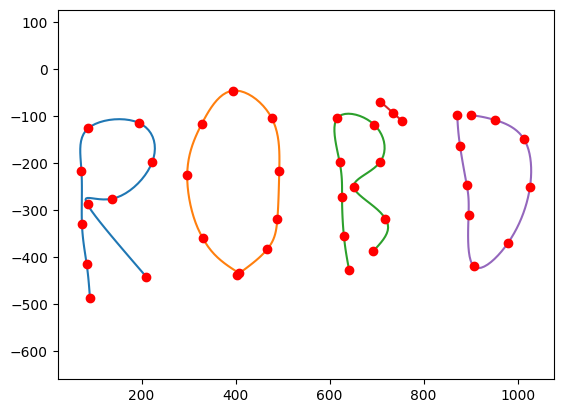

In [16]:
# === YOUR CODE HERE ===
pointsForLetters = np.linspace(Rcalc[2][0], Rcalc[2][-1], 100)
pointsForDash = np.linspace(dashcalc[2][0], dashcalc[2][-1], 100)
plt.axis('equal')
plt.plot(Rcalc[0](pointsForLetters), list(map(lambda val: -val, Rcalc[1](pointsForLetters)))) # This is for flipping it so it displays correctly! 
plt.plot(Ocalc[0](pointsForLetters), list(map(lambda val: -val, Ocalc[1](pointsForLetters))))
plt.plot(Bcalc[0](pointsForLetters), list(map(lambda val: -val, Bcalc[1](pointsForLetters))))
plt.plot(dashcalc[0](pointsForDash), list(map(lambda val: -val, dashcalc[1](pointsForDash))))
plt.plot(Dcalc[0](pointsForLetters), list(map(lambda val: -val, Dcalc[1](pointsForLetters))))

plt.plot(R_x, list(map(lambda val: -val, R_y)), 'ro')
plt.plot(O_x, list(map( lambda val: -val, O_y)), 'ro')
plt.plot(B_x, list(map(lambda val: -val, B_y)), 'ro')
plt.plot(dash_x, list(map(lambda val: -val, dash_y)), 'ro')
plt.plot(D_x, list(map(lambda val: -val, D_y)), 'ro')
#plt.plot(t,y,'ro');